# Analysis of the Palmer penguin dataset
*************

The original dataset has been taken from the official Github [page](https://allisonhorst.github.io/palmerpenguins/). 

![pinguins_img](images/palmerpenguins.png)

The data were collected from 2007 - 2009 by Dr. Kristen Gorman with the Palmer Station Long Term Ecological Research Program, part of the US Long Term Ecological Research Network. The palmerpenguins data contains size measurements for three penguin species observed on three islands in the Palmer Archipelago, Antarctica.

## The goal of the analysis

The aim of this project is to analyze the dataset using Python. The objective is to suggest the appropriate types of variables that can effectively analyze the data. By creating a bar chart and a histogram of appropriate variables, the project aims to provide insights into the dataset through visualization.

## Import the dataset and the libraries

In [30]:
# import  libraries

import pandas as pd
import sys
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [31]:
# download the data set

data = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

In [32]:
# output the first 3 raws
data.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


## Description of the dataset

In [33]:
# information about the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [34]:
# The data contains some NAN values. 
# I am using the isnull() method to check for the number of these values.

data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [35]:
# Theare are 11 values missed in the "sex" column, and 2 in each of the measurements columns.
# I can calculate the mean of these values to determine if it is sagnificant loss.

display(data.isna().mean()*100)

species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64

In [36]:
# Cheking for duplicates:
data.duplicated().sum()

0

Dataset contains 7 columns, 344 rows. 
The "species", "island", and "sex" columns contain the object type variables.
The rest of the columns contain the flot type of variables.
The higer percentage of NaN values among the columns is less than 4 % of the data (column "sex"), that might be considered as acceptable. 
Other options are to try to replace the NaN values with the mean of the other columns of to remove the rows which contain NaN values in the most of the columns. 
The are no duplicated rows in the dataset.


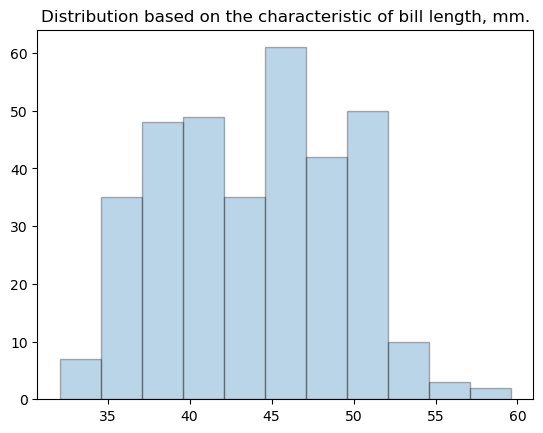

count    342.000000
mean      43.921930
std        5.459584
min       32.100000
25%       39.225000
50%       44.450000
75%       48.500000
max       59.600000
Name: bill_length_mm, dtype: float64

In [37]:
# Now I can have a look at the distribution of data for some variables. 
# The histogram below shows the distribution of data by feature "bill_length_mm".
y = np.array(data['bill_length_mm']) 
plt.hist(y, bins= 'auto',edgecolor = "black",alpha = 0.3)
plt.title("Distribution based on the characteristic of bill length, mm.")
plt.show()
data['bill_length_mm'].describe()

The mean bill length is approximately 43.92 millimeters, with a standard deviation of 5.46 millimeters. The bill lengths range from 32.1 to 59.6 millimeters, indicating a diverse range of sizes within the population. 
The dataset exhibits a normal standart distribution, as reflected by the similarity between the mean and median values.

I would like to have a look at the distribution of the bill lengths among the species.

In [38]:
data['species'].value_counts() # the species we have in the dataset

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [39]:
# creating 3 datatsets with 3 species:
adelie_data = data[data['species'] == 'Adelie']
chinstrap_data = data[data['species'] == 'Chinstrap']
gentoo_data = data[data['species'] == 'Gentoo']


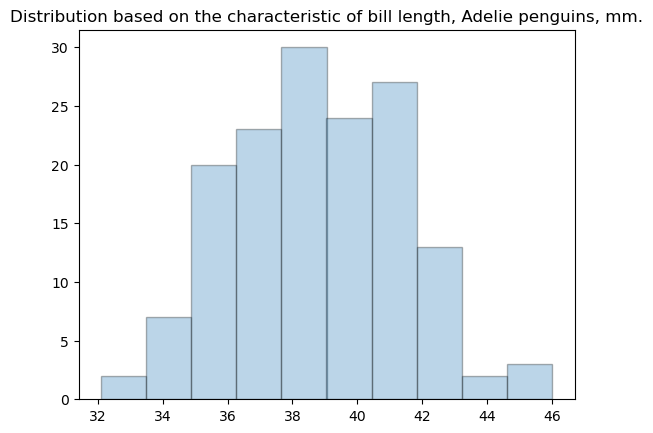

count    151.000000
mean      38.791391
std        2.663405
min       32.100000
25%       36.750000
50%       38.800000
75%       40.750000
max       46.000000
Name: bill_length_mm, dtype: float64

In [40]:
adelie_y = np.array(adelie_data['bill_length_mm']) 
plt.hist(adelie_y, bins= 'auto',edgecolor = "black",alpha = 0.3)
plt.title("Distribution based on the characteristic of bill length, Adelie penguins, mm.")
plt.show()
adelie_data['bill_length_mm'].describe()

*****
## Correlation between variables    

In [41]:
data.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


/Users/katelisovenko/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


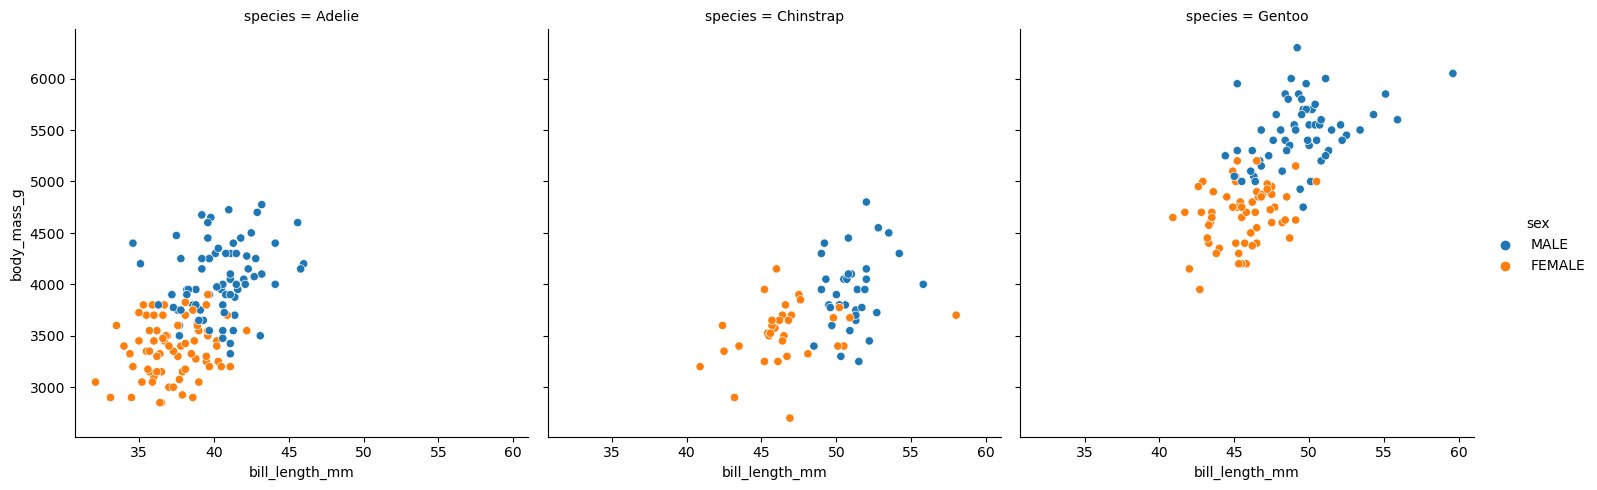

In [66]:
# https://www.statology.org/seaborn-title/

plot= sns.relplot(x="bill_length_mm", y='body_mass_g', col = "species", data=data,hue = "sex", kind = "scatter")



### Coefficients of correlation  between variables "bill_length_mm" and "body_mass_g" for all 3 species together.

In [80]:
data['bill_length_mm'].corr(data['body_mass_g'])

0.5951098244376298

The coefficients of correlation of 0.6 shows insignificant correlation between the variables.
That means that somthimes we can say that bill length might be bigger when the mass of the penguins higher.
On the scatter plots above we can observe that probabbly differernt species have different correlathion between these variables.
It might be a good idea to calculate the coefficient of correlation separately for every species.
At the same time there is no doubt that male spicies are more likely to have higher body mass and bill length than female spicies.

***

# End
